<a href="https://colab.research.google.com/github/EunmiYoo/Decision-tree-ensemble-/blob/main/%EB%AF%B8%EC%85%984_4%ED%8C%80_%EC%9C%A0%EC%9D%80%EB%AF%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing



bank = pd.read_csv('/content/drive/MyDrive/AI4기/data/bank-additional-full.csv',sep=';')

In [ ]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank.isnull().sum() #결측치 없음

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
#중복값 확인
bank.duplicated().sum()

np.int64(12)

In [ ]:
# 중복값 자세히 확인
bank[bank.duplicated(keep= 'first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
#중복값 제거 12개
bank = bank.drop_duplicates()

In [ ]:
# 잘 제거됐는지 확인
bank.duplicated().sum()

np.int64(0)

In [ ]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
bank['y']

,y
0,no
1,no
2,no
3,no
4,no
...,...
41183,yes
41184,no
41185,no
41186,yes


In [ ]:
#연령별 마케팅에의한 가입
bank_age = bank.groupby('age')['y'].value_counts().unstack()
bank_age


y,no,yes
age,,
17,3.0,2.0
18,16.0,12.0
19,22.0,20.0
20,42.0,23.0
21,73.0,29.0
...,...,...
91,2.0,NaN
92,1.0,3.0
94,1.0,NaN


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

#연령에 따른  예금가입률
그래프를 보면 대부분의 연령대에서 정기 예금에 가입하지 않은 고객의 수가 가입한 고객의 수보다 훨씬 많다

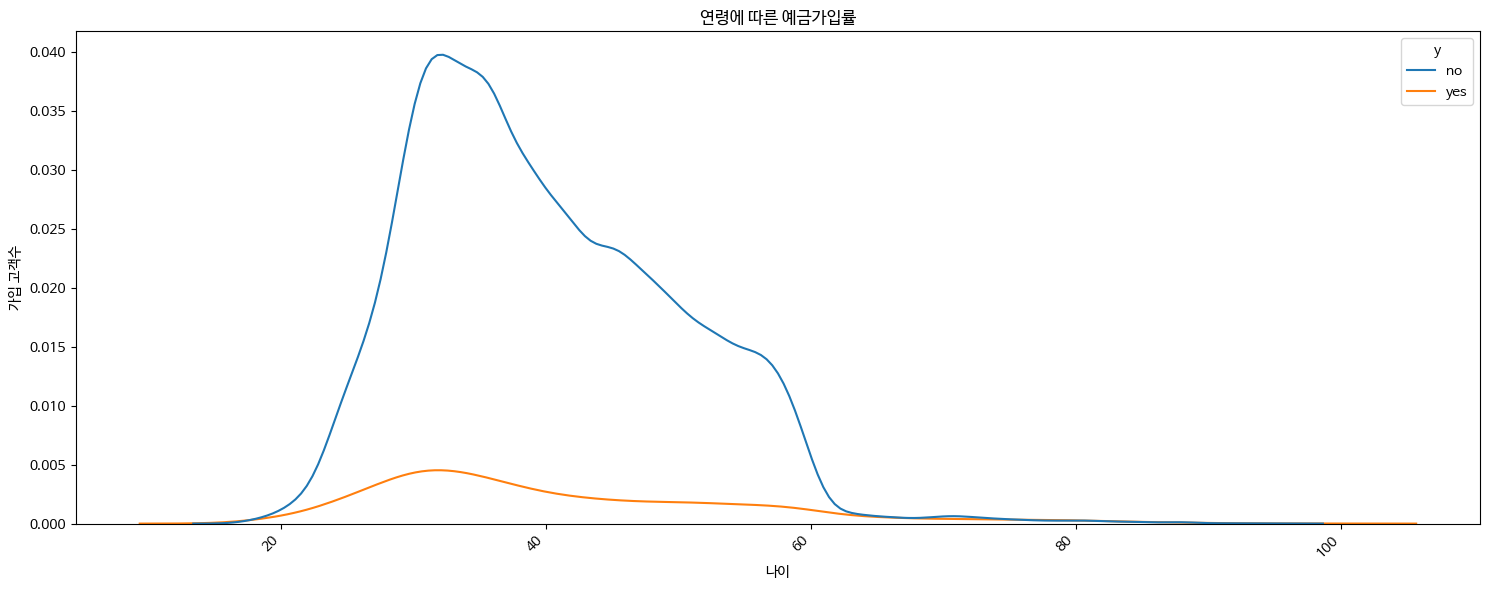

In [ ]:
plt.figure(figsize=(15, 6))
sns.kdeplot(data=bank, x='age', hue='y')
plt.title('연령에 따른 예금가입률')
plt.xlabel('나이')
plt.ylabel('가입 고객수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#직업별 정기예금 가입현황
bank_employ = bank.groupby('job')['y'].value_counts().unstack()
bank_employ

y,no,yes
job,,
admin.,9068,1351
blue-collar,8615,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1284,434
self-employed,1272,149
services,3644,323
student,600,275


<Figure size 1200x700 with 0 Axes>

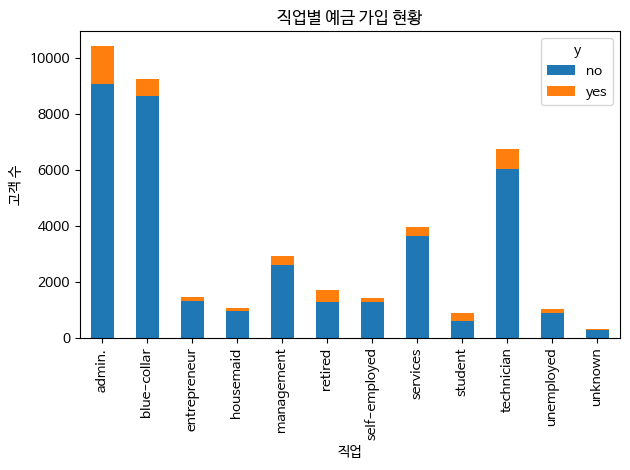

In [ ]:
plt.figure(figsize=(12, 7))
bank_employ.plot(kind='bar', stacked=True)
plt.title('직업별 예금 가입 현황')
plt.xlabel('직업')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

직업별 정기예금 가입률이 그나마 높은 직군은 관리직(admin)이다

In [ ]:
bank['contact'].value_counts()

,count
contact,
cellular,26135
telephone,15041


In [ ]:
#결혼여부에 따른 정기예금 가입현황
bank_marital = bank.groupby('marital')['y'].value_counts().unstack()
bank_marital

y,no,yes
marital,,
divorced,4135,476
married,22390,2531
single,9944,1620
unknown,68,12


<Figure size 1200x700 with 0 Axes>

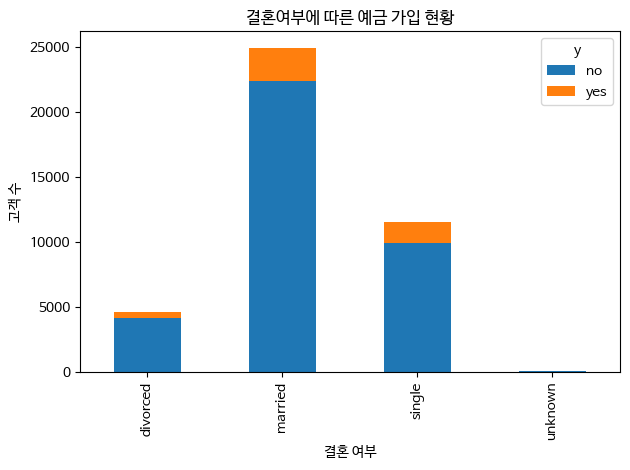

In [ ]:
plt.figure(figsize=(12, 7))
bank_marital.plot(kind='bar', stacked=True)
plt.title('결혼여부에 따른 예금 가입 현황')
plt.xlabel('결혼 여부')
plt.ylabel('고객 수')
plt.tight_layout()
plt.show()

기혼자중에서 정기예금가입률이 그나마 높다

In [ ]:
bank['emp.var.rate'].value_counts()

,count
emp.var.rate,
1.4,16228
-1.8,9182
1.1,7762
-0.1,3682
-2.9,1662
-3.4,1070
-1.7,773
-1.1,635
-3.0,172


In [ ]:
print(bank['emp.var.rate'].min())

-3.4


# 고용 변동률에 따른 예금가입의 시각화
고용변동률과 예금 가입률이 직접적인 관계가 있음을 알수 있는 그래프.
고용률이 좋아짐에 따라 예금 가입률이 높아짐

In [ ]:
bank_price = bank.groupby('emp.var.rate')['y'].value_counts().unstack()
bank_price

y,no,yes
emp.var.rate,,
-3.4,616,454
-3.0,84,88
-2.9,1069,593
-1.8,7721,1461
-1.7,370,403
-1.1,334,301
-0.2,9,1
-0.1,3450,232
1.1,7522,240


<Figure size 600x400 with 0 Axes>

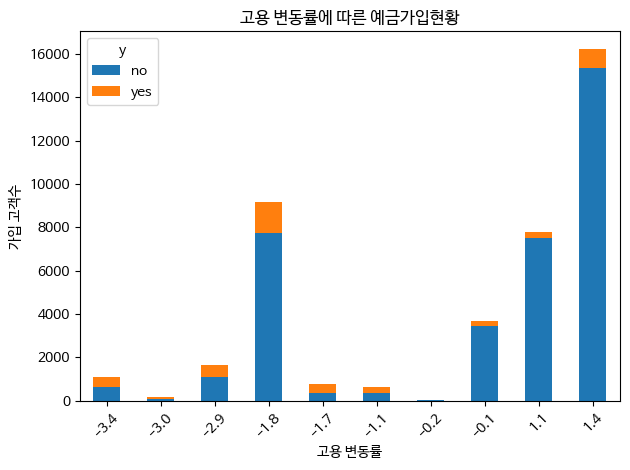

In [ ]:
# 고용변동률에 따른 예금 가입현황 시각화
plt.figure(figsize=(6, 4))
#sns.histplot(data=bank, x='emp.var.rate', kde=True)
bank_price.plot(kind='bar', stacked=True)
plt.title('고용 변동률에 따른 예금가입현황')
plt.xlabel('고용 변동률')
plt.ylabel('가입 고객수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
bank_price = bank.groupby('cons.price.idx')['y'].value_counts().unstack()
bank_price

y,no,yes
cons.price.idx,,
92.201,506,264
92.379,161,106
92.431,266,180
92.469,112,65
92.649,189,168
92.713,84,88
92.756,9,1
92.843,156,126
92.893,5269,524


<Figure size 600x400 with 0 Axes>

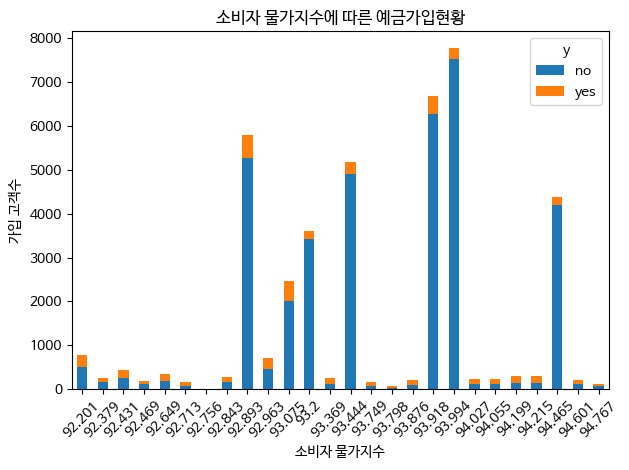

In [ ]:
# 소비자 물가지수에 따른 예금 가입현황 시각화
plt.figure(figsize=(6, 4))
bank_price.plot(kind='bar', stacked=True)
plt.title('소비자 물가지수에 따른 예금가입현황')
plt.xlabel('소비자 물가지수')
plt.ylabel('가입 고객수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3개월 유리보 금리에 따른 예금가입률 시각화
여기서도 상관관계가 있음을 찾았다... 당연한 얘기지만 금리가 높을수록 정기 예금 가입률이 높아짐...

In [ ]:
bank_3m = bank.groupby('euribor3m')['y'].value_counts().unstack()
bank_3m

y,no,yes
euribor3m,,
0.634,2.0,6.0
0.635,21.0,22.0
0.636,11.0,3.0
0.637,1.0,5.0
0.638,2.0,5.0
...,...,...
4.967,610.0,33.0
4.968,934.0,57.0
4.970,168.0,4.0


<Figure size 3000x400 with 0 Axes>

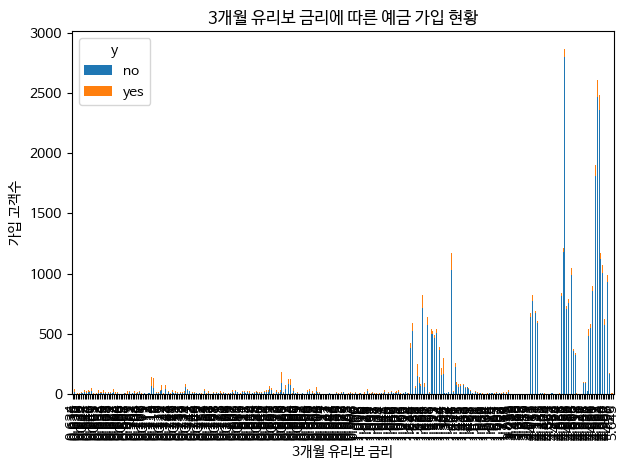

In [ ]:
# 3개월 유리보 금리에 따른 예금 가입현황 시각화
plt.figure(figsize=(30, 4))
bank_3m.plot(kind='bar', stacked=True)
plt.title('3개월 유리보 금리에 따른 예금 가입 현황')
plt.xlabel('3개월 유리보 금리')
plt.ylabel('가입 고객수')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
bank_cons = bank.groupby('cons.conf.idx')['y'].value_counts().unstack()
bank_cons

y,no,yes
cons.conf.idx,,
-50.8,70,58
-50.0,156,126
-49.5,111,93
-47.1,2015,442
-46.2,5269,524
-45.9,9,1
-42.7,6274,407
-42.0,3425,190
-41.8,4186,188


<Figure size 1000x400 with 0 Axes>

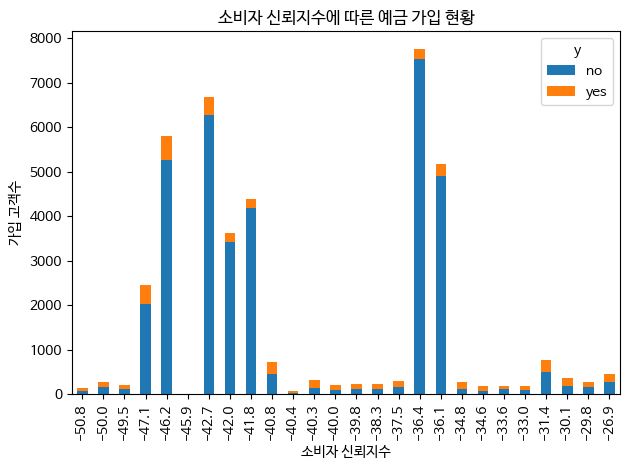

In [ ]:
# 소비자 신뢰지수 에 따른 예금 가입 현황 시각화
plt.figure(figsize=(10, 4))
bank_cons.plot(kind='bar', stacked=True)
plt.title('소비자 신뢰지수에 따른 예금 가입 현황')
plt.xlabel('소비자 신뢰지수')
plt.ylabel('가입 고객수')
plt.tight_layout()
plt.show()

In [ ]:
bank_nr_empl = bank.groupby('nr.employed')['y'].value_counts().unstack()
bank_nr_empl

y,no,yes
nr.employed,,
4963.6,334,301
4991.6,370,403
5008.7,281,369
5017.5,616,454
5023.5,84,88
5076.2,1069,593
5099.1,7440,1092
5176.3,9,1
5191.0,7522,240


<Figure size 600x400 with 0 Axes>

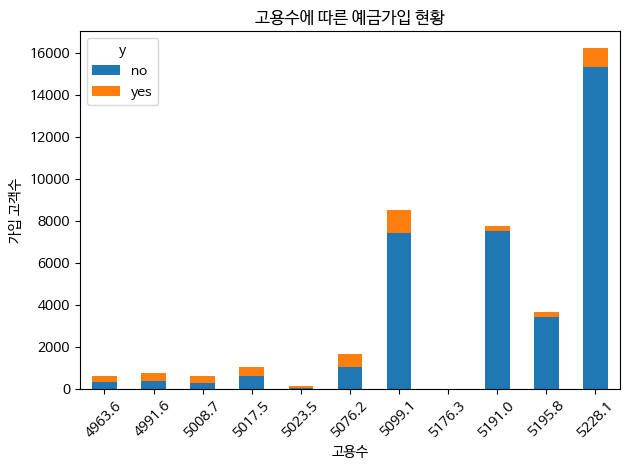

In [ ]:
#고용수에 따른 정기예금 가입현황 시각화
plt.figure(figsize=(6, 4))
bank_nr_empl.plot(kind='bar', stacked=True)
plt.title('고용수에 따른 예금가입 현황')
plt.xlabel('고용수')
plt.ylabel('가입 고객수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#y값 수치형으로 변환 매핑이용(0:가입안함 , 1:가입함)
mapping = {'no': 0, 'yes': 1}
bank['y'] = bank['y'].map(mapping)
bank['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
bank['job'].value_counts()

,count
job,
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


In [ ]:
#job값 수치형으로 변환 매핑이용
mapping_job = {'admin.': 1, 'blue-collar': 2,'technician' : 3, 'services':4, 'management':5, 'retired':6, 'self-employed':7, 'entrepreneur':8, 'unemployed':9, 'housemaid':10, 'student':11, 'unknown':12}
bank['job'] = bank['job'].map(mapping_job)
bank['job']

,job
0,10
1,4
2,4
3,1
4,4
...,...
41183,6
41184,2
41185,6
41186,3


In [ ]:

bank['marital'].value_counts()

,count
marital,
married,24921
single,11564
divorced,4611
unknown,80


In [ ]:
#marital값 수치형으로 변환 매핑이용
mapping_marital= {'married': 1, 'single': 2,'divorced' : 3,'unknown': 4}
bank['marital'] = bank['marital'].map(mapping_marital)


In [ ]:
bank['marital'].value_counts()

,count
marital,
1,24921
2,11564
3,4611
4,80


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank['education'].value_counts()

,count
education,
university.degree,12164
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
unknown,1730
illiterate,18


In [ ]:
#education값 수치형으로 변환 매핑이용
mapping_edu= {'university.degree': 1, 'high.school': 2,'basic.9y' : 3,'professional.course': 4, 'basic.4y':5, 'basic.6y':6, 'illiterate':7, 'unknown':8}
bank['education'] = bank['education'].map(mapping_edu)

In [ ]:
bank['education'].value_counts()

,count
education,
1,12164
2,9512
3,6045
4,5240
5,4176
6,2291
8,1730
7,18


In [ ]:
bank['default'].value_counts()

,count
default,
no,32577
unknown,8596
yes,3


In [ ]:
#default수치형으로 변환 매핑이용
mapping_default = {'no': 1, 'yes': 2, 'unknown': 3}
bank['default'] = bank['default'].map(mapping_default)
bank['default'].value_counts()

,count
default,
1,32577
3,8596
2,3


In [ ]:
bank['housing'].value_counts()

,count
housing,
yes,21571
no,18615
unknown,990


In [ ]:
#housing값 수치형으로 변환 매핑이용
mapping_housing = {'no': 1, 'yes': 2, 'unknown': 3}
bank['housing'] = bank['housing'].map(mapping_housing)
bank['housing'].value_counts()

,count
housing,
2,21571
1,18615
3,990


In [ ]:
bank['loan'].value_counts()

,count
loan,
no,33938
yes,6248
unknown,990


In [ ]:
#loan값 수치형으로 변환 매핑이용
mapping_loan = {'no': 1, 'yes': 2, 'unknown': 3}
bank['loan'] = bank['loan'].map(mapping_loan)
bank['loan'].value_counts()

,count
loan,
1,33938
2,6248
3,990


In [ ]:
bank['contact'].value_counts()

,count
contact,
cellular,26135
telephone,15041


In [ ]:
#contact값 수치형으로 변환 매핑이용
mapping_contact = {'cellular': 1, 'telephone': 2}
bank['contact'] = bank['contact'].map(mapping_contact)
bank['contact'].value_counts()

,count
contact,
1,26135
2,15041


In [ ]:
bank['month'].value_counts()

,count
month,
may,13767
jul,7169
aug,6176
jun,5318
nov,4100
apr,2631
oct,717
sep,570
mar,546


# 마지막 캠페인 연락 월의 가입현황
1,2월은 마케팅이 없었는지 자료가 없음.
3월과 12월의 정기예금 가입률이 높음

In [ ]:
#month값 수치형으로 변환 매핑이용
mapping_month = {'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12,'jan':1,'feb':2}
bank['month'] = bank['month'].map(mapping_month)
bank['month'].value_counts()

,count
month,
5,13767
7,7169
8,6176
6,5318
11,4100
4,2631
10,717
9,570
3,546


In [ ]:
group_month = bank.groupby('month')['y'].mean()
group_month

,y
month,
3,0.505495
4,0.204865
5,0.064357
6,0.105115
7,0.090389
8,0.106056
9,0.449123
10,0.439331
11,0.101463


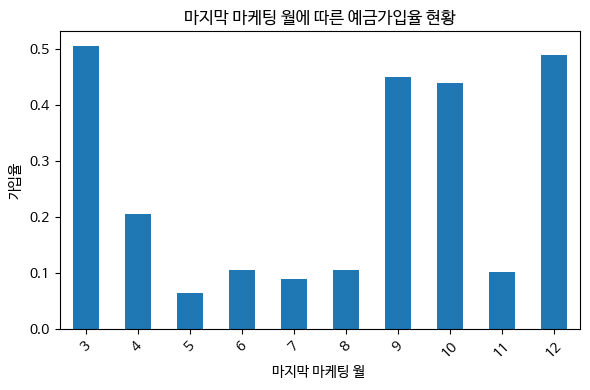

In [ ]:
plt.figure(figsize=(6, 4))
group_month.plot(kind='bar', stacked=True)
plt.title('마지막 마케팅 월에 따른 예금가입율 현황')
plt.xlabel('마지막 마케팅 월 ')
plt.ylabel('가입율')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
bank['day_of_week'].value_counts()

,count
day_of_week,
thu,8618
mon,8512
wed,8134
tue,8086
fri,7826


수치형으로 매핑후 확인해보니 요일들이 고르게 나온듯...특이점 없음

In [ ]:
#day값 수치형으로 변환 매핑이용
mapping_day = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}
bank['day_of_week'] = bank['day_of_week'].map(mapping_day)
bank['day_of_week'].value_counts()

,count
day_of_week,
4,8618
1,8512
3,8134
2,8086
5,7826


# 이전 캠페인 결과...
이전 캠패인에서 성공한 사람들의 가입여부 성공비율을 살펴보자..  

In [ ]:
bank['poutcome'].value_counts()

,count
poutcome,
nonexistent,35551
failure,4252
success,1373


In [ ]:
poutcome_group = bank.groupby('poutcome')['y'].mean()
poutcome_group

,y
poutcome,
failure,0.142286
nonexistent,0.088324
success,0.651129


이전 캠페인에서 성공한 사람들의 이번 캠페인에서의 성공률이 65프로.... 상관관계가 아주 높다 볼수 있겠다...

In [ ]:
#poutcome값 수치형으로 변환 매핑이용(이전 마케팅의 결과)
mapping_poutcome = {'nonexistent' : 1, 'failure': 2, 'success': 3}
bank['poutcome'] = bank['poutcome'].map(mapping_poutcome)
bank['poutcome'].value_counts()

,count
poutcome,
1,35551
2,4252
3,1373


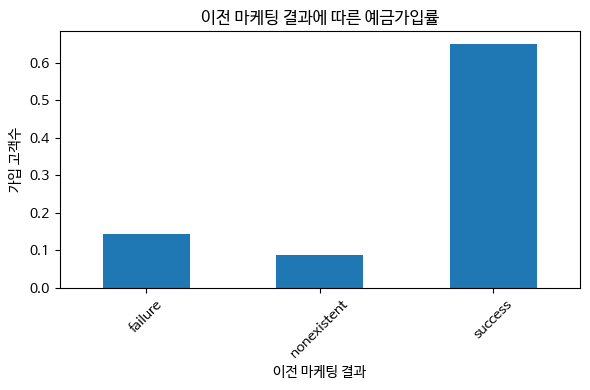

In [ ]:
#poutcome값 시각화 (이전 마케팅의 결과)'failure' = 2,'nonexistent' = 1,'success = 3

plt.figure(figsize=(6, 4))
poutcome_group.plot(kind='bar', stacked=True)
plt.title('이전 마케팅 결과에 따른 예금가입률')
plt.xlabel('이전 마케팅 결과')
plt.ylabel('가입 고객수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
bank['pdays'].value_counts()

,count
pdays,
999,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# pdays 변수 중 999(마케팅을 전화를 한번도 받지 않은 사람들) 처리

pdays 변수중 가장 마지막 숫자 28로 대체함, 개인적인 생각으로 999라는 숫자가 너무 크다는 느낌에...

In [ ]:
bank['pdays'] = bank['pdays'].replace(999, 28)
bank['pdays'].value_counts()

,count
pdays,
28,39661
3,439
6,412
4,118
9,64
2,61
7,60
12,58
10,52


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [ ]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed']

In [ ]:
features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
#feature_scaling
scaler = preprocessing.MinMaxScaler()
bank['emp.var.rate'] = scaler.fit_transform(bank[['emp.var.rate']]) #고용 변동률 - 분기별 지표(숫자)
bank['cons.conf.idx'] = scaler.fit_transform(bank[['cons.conf.idx']]) #소비자 신뢰 지수 - 월별 지표(숫자)
bank['euribor3m'] = scaler.fit_transform(bank[['euribor3m']]) # 3개월 유리보 금리 (숫자)
bank['cons.price.idx'] = scaler.fit_transform(bank[['cons.price.idx']]) #소비자 물가지수 (숫자)

In [ ]:
X = bank[features]
y = bank['y']

In [ ]:
print(type(y))

<class 'pandas.core.series.Series'>


In [ ]:
X

,age,job,marital,education,default,housing,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,10,1,5,1,1,5,1,1,28,0,1,0.937500,0.698753,0.60251,0.957379,5191.0
1,57,4,1,2,3,1,5,1,1,28,0,1,0.937500,0.698753,0.60251,0.957379,5191.0
2,37,4,1,2,1,2,5,1,1,28,0,1,0.937500,0.698753,0.60251,0.957379,5191.0
3,40,1,1,6,1,1,5,1,1,28,0,1,0.937500,0.698753,0.60251,0.957379,5191.0
4,56,4,1,2,1,1,5,1,1,28,0,1,0.937500,0.698753,0.60251,0.957379,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,4,1,2,11,5,1,28,0,1,0.479167,1.000000,0.00000,0.089322,4963.6
41184,46,2,1,4,1,1,11,5,1,28,0,1,0.479167,1.000000,0.00000,0.089322,4963.6
41185,56,6,1,1,1,2,11,5,2,28,0,1,0.479167,1.000000,0.00000,0.089322,4963.6
41186,44,3,1,4,1,1,11,5,1,28,0,1,0.479167,1.000000,0.00000,0.089322,4963.6


In [ ]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [ ]:
bank['y'].value_counts()

,count
y,
0,36537
1,4639


In [ ]:
#데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb

In [ ]:
#모델링

model = xgb.XGBClassifier(
                        max_depth = 5,
                        n_estimators = 100,
                        objective='binary:logistic',
                        learning_rate = 0.15,
                        random_state=42
                        )
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
#예측및 결과보기
y_pred = model.predict(X_test.values)



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8952161243322001


In [ ]:
model.feature_importances_

array([0.00502856, 0.0047358 , 0.00499246, 0.00439926, 0.00994891,
       0.00427727, 0.03085122, 0.00726859, 0.00499816, 0.01870495,
       0.00661599, 0.09023465, 0.05653628, 0.00662019, 0.00666103,
       0.00954338, 0.72858334], dtype=float32)

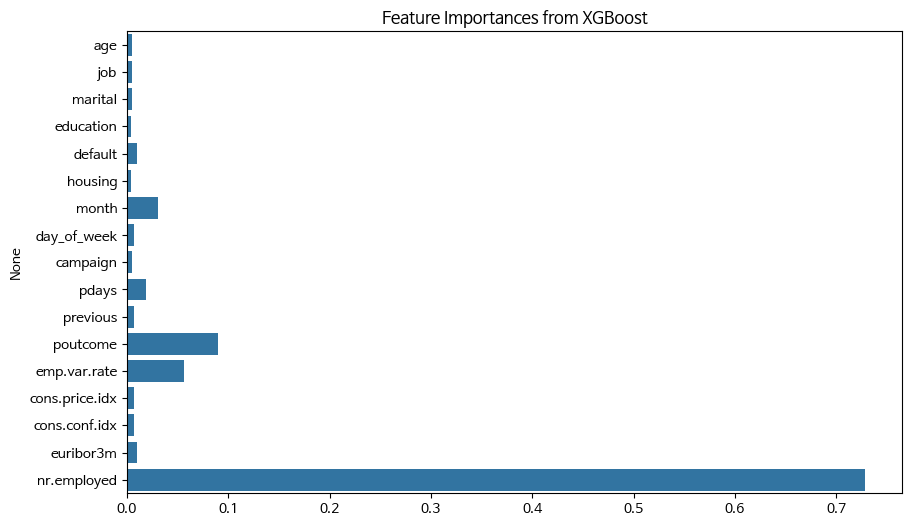

In [ ]:
#속성중요도 시각화
plt.figure(figsize=(10,6))
sns.barplot(y=X.columns,x=model.feature_importances_)
plt.title('Feature Importances from XGBoost')
plt.show()